In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from math import sqrt
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

def Distance(i,j,x,y):
    return sqrt(pow(x-i, 2)+ pow(y-j, 2))

#Calculates the correlation coefficient between each combination of pixels
#original data in form (x, y, time)
#result is dataframe with columns distance and correlation
def Correlations(data, type):
    x_size = data.shape[0]
    y_size = data.shape[1]
    pairs = np.zeros((x_size*y_size*x_size*y_size,2))
    if type == "pearson":
        for i in range(x_size):
            print(f"{i}/{x_size}")
            for j in range(y_size):
                for x in range(x_size):
                    for y in range(y_size):
                        pairs[i*y_size*x_size*y_size+j*x_size*y_size+x*y_size+y, 0] = Distance(i,j,x,y)
                        pairs[i*y_size*x_size*y_size+j*x_size*y_size+x*y_size+y, 1] = pearsonr(data[i,j], data[x,y])[0]
    elif type == "spearman":
        for i in range(x_size):
            print(f"{i}/{x_size}")
            for j in range(y_size):
                for x in range(x_size):
                    for y in range(y_size):
                        pairs[i*y_size*x_size*y_size+j*x_size*y_size+x*y_size+y, 0] = Distance(i,j,x,y)
                        pairs[i*y_size*x_size*y_size+j*x_size*y_size+x*y_size+y, 1] = spearmanr(data[i,j], data[x,y])[0]
                        #print(f"{data[i,j]} spearman corr with {data[x,y]}: {result[i, j, x, y]}")
    else:
        raise Exception("Invalid correlation type name")
    return pd.DataFrame(pairs)

def PlotandSave(df, sample, type):
    plt.figure()
    df.plot(0,1,legend=None, kind='scatter')
    plt.xlabel("Distance")
    plt.ylabel("Correlation")
    plt.title(f"Scatter plot of {corrtype} correlation of sample {sample}")
    plt.savefig(f"Correlation_plots\scatter{sample}.png", format='png', transparent = False, facecolor = 'w')
    plt.show()
    
    #m = df.min()
    #print(f"Min = {m[1]}")
    
    dfmean = df.groupby([0]).mean()
    #print(dfmean)
    
    plt.figure()
    dfmean.plot(legend=None)
    plt.xlabel("Distance")
    plt.ylabel("Correlation (mean)")
    plt.title(f"Mean {corrtype} correlation of sample {sample}")
    plt.savefig(f"Correlation_plots\mean{sample}.png", format='png', transparent = False, facecolor = 'w')
    plt.show()

C:\Users\tomim\anaconda3\envs\Correlation\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

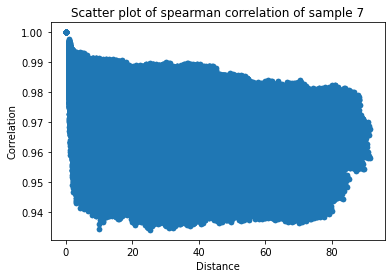

<Figure size 432x288 with 0 Axes>

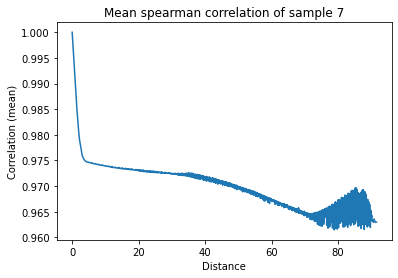

In [5]:
a = np.array([[[1,2,3],[2,4,6]],[[3,6,1],[2,8,2]]])
data = np.load("C:\\Users\\tomim\\OneDrive\\Työpöytä\\Työt\\Python\\RGBanalysisFull\\RGB\\Calibrated\\sample_r_cal.csv.npy")
sample = 20
corrtype = "spearman"
data = data[sample-1]

res = Correlations(data, corrtype)
PlotandSave(res, sample, corrtype)

In [18]:

res.to_pickle("Correlation_plots\\spearcorr9")

In [19]:
ddd = pd.read_pickle("Correlation_plots\\spearcorr9")
print(ddd)


           0         1
0        0.0  1.000000
1        1.0  0.959309
2        2.0  0.940597
3        3.0  0.933193
4        4.0  0.926786
...      ...       ...
9060095  4.0  0.959789
9060096  3.0  0.961391
9060097  2.0  0.968887
9060098  1.0  0.984297
9060099  0.0  1.000000

[9060100 rows x 2 columns]


hahaa
hahaa
hahaa


<Figure size 432x288 with 0 Axes>

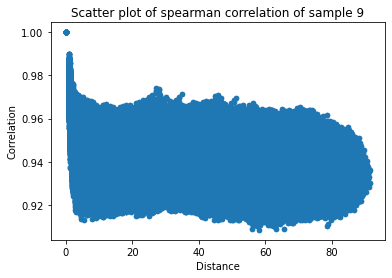

                  1
0                  
0.000000   1.000000
1.000000   0.976541
1.414214   0.967516
2.000000   0.956980
2.236068   0.954406
...             ...
90.476516  0.934995
90.620086  0.934676
90.824006  0.934217
91.181138  0.933061
91.547802  0.933058

[1865 rows x 1 columns]


<Figure size 432x288 with 0 Axes>

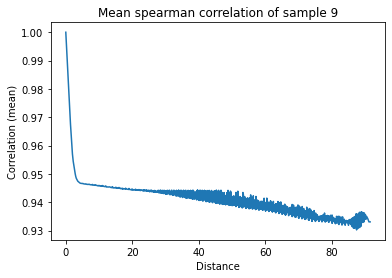

<Figure size 432x288 with 0 Axes>

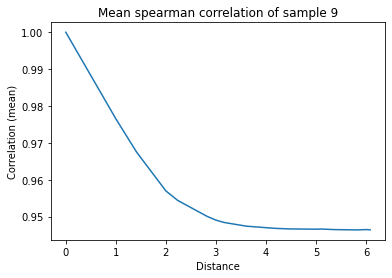

In [26]:
ddd = pd.read_pickle("Correlation_plots\\spearcorr9")
#ddd = pd.read_pickle("Correlation_plots\\spearcorr13")
df2 = ddd
sample = 9

print("hahaa")

plt.figure()
print("hahaa")
df2.plot(0,1,legend=None, kind='scatter')
print("hahaa")
plt.xlabel("Distance")
plt.ylabel("Correlation")
plt.title(f"Scatter plot of {corrtype} correlation of sample {sample}")
#plt.savefig(f"Correlation_plots\scatter{sample}.png", format='png', transparent = False, facecolor = 'w')
plt.show()

#m = df.min()
#print(f"Min = {m[1]}")

dfmean2 = df2.groupby([0]).mean()
print(dfmean2)

plt.figure()
dfmean2.plot(legend=None)
plt.xlabel("Distance")
plt.ylabel("Correlation (mean)")
plt.title(f"Mean {corrtype} correlation of sample {sample}")
#plt.savefig(f"Correlation_plots\mean{sample}.png", format='png', transparent = False, facecolor = 'w')
plt.show()

dfmean2 = dfmean2.head(20)

plt.figure()
dfmean2.plot(legend=None)
plt.xlabel("Distance")
plt.ylabel("Correlation (mean)")
plt.title(f"Mean {corrtype} correlation of sample {sample}")
#plt.savefig(f"Correlation_plots\mean{sample}.png", format='png', transparent = False, facecolor = 'w')
plt.show()

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

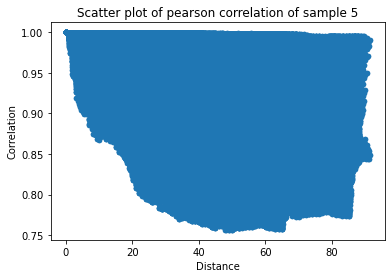

<Figure size 432x288 with 0 Axes>

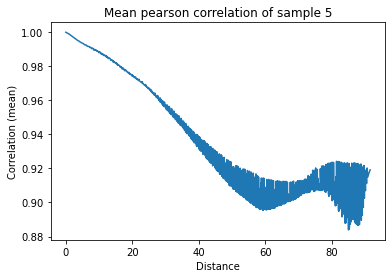

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

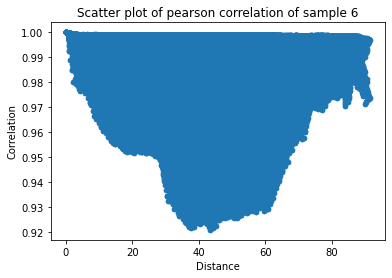

<Figure size 432x288 with 0 Axes>

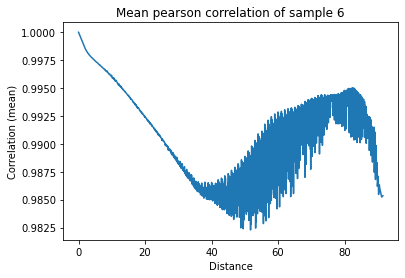

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

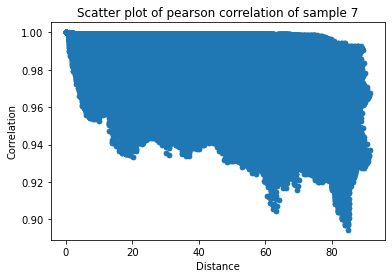

<Figure size 432x288 with 0 Axes>

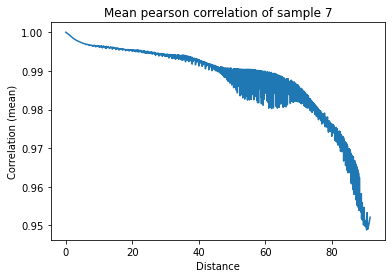

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

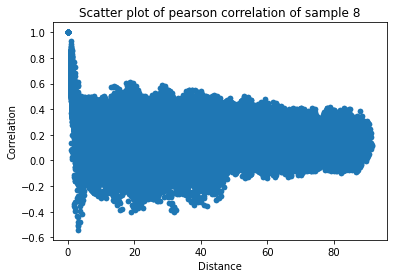

<Figure size 432x288 with 0 Axes>

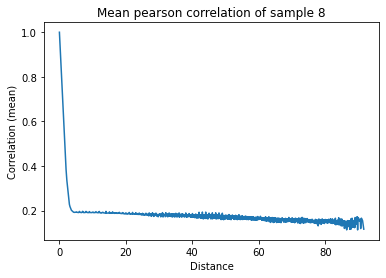

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

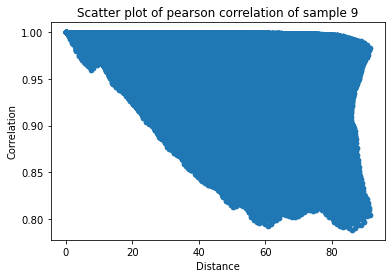

<Figure size 432x288 with 0 Axes>

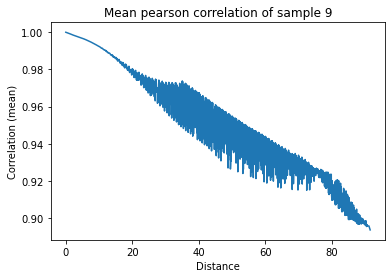

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

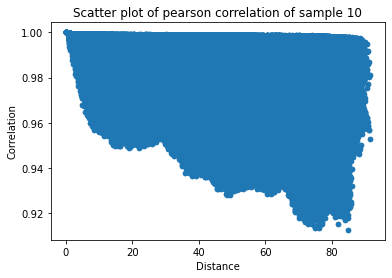

<Figure size 432x288 with 0 Axes>

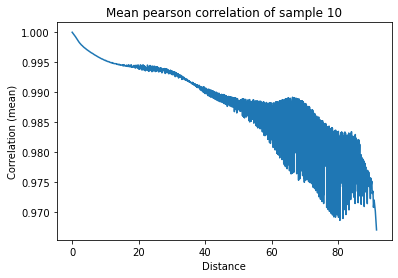

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

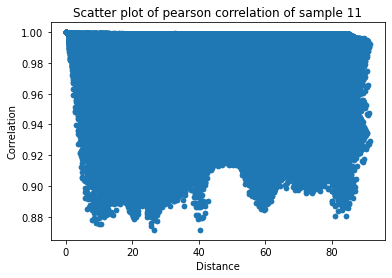

<Figure size 432x288 with 0 Axes>

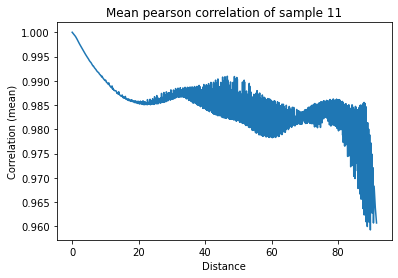

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

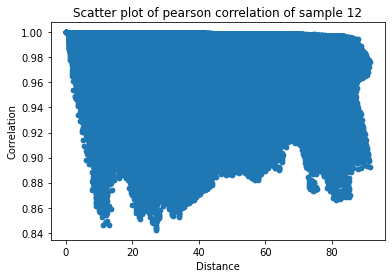

<Figure size 432x288 with 0 Axes>

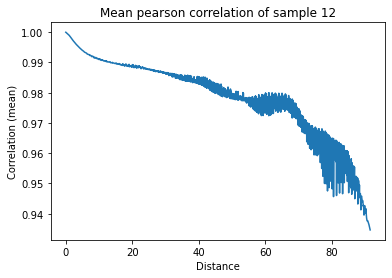

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

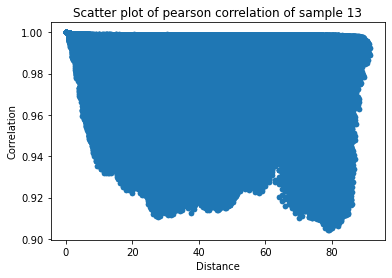

<Figure size 432x288 with 0 Axes>

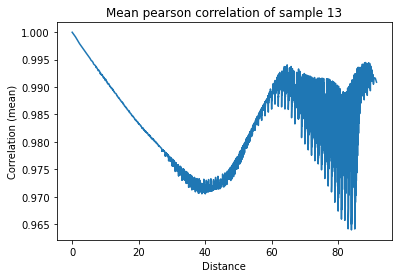

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

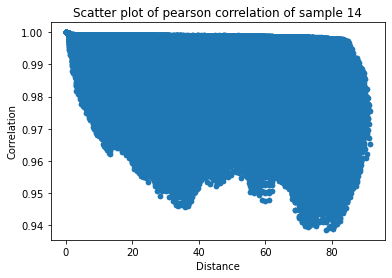

<Figure size 432x288 with 0 Axes>

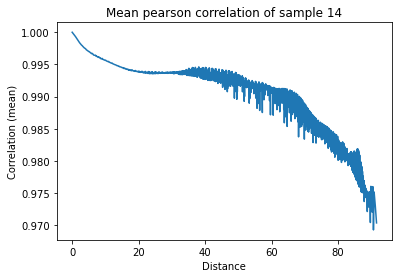

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

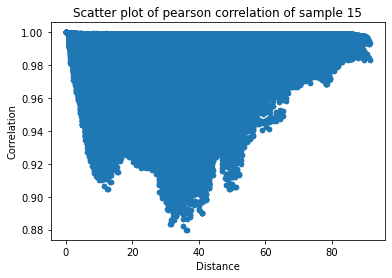

<Figure size 432x288 with 0 Axes>

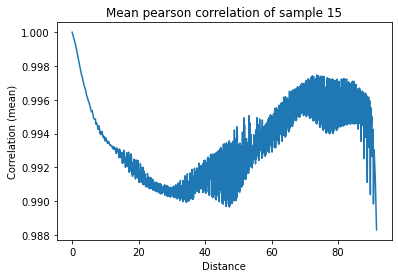

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

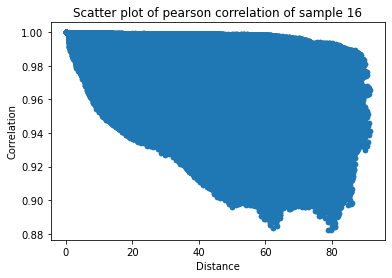

<Figure size 432x288 with 0 Axes>

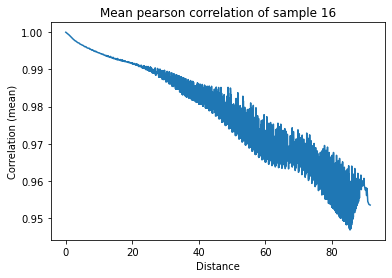

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

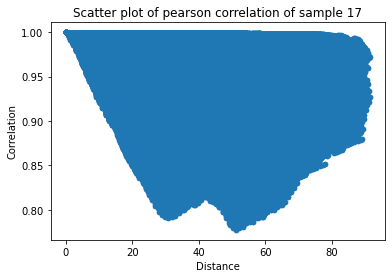

<Figure size 432x288 with 0 Axes>

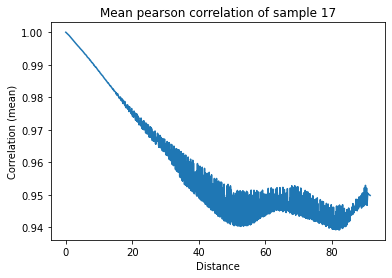

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

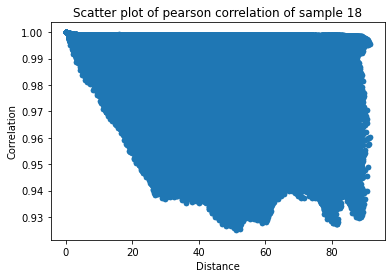

<Figure size 432x288 with 0 Axes>

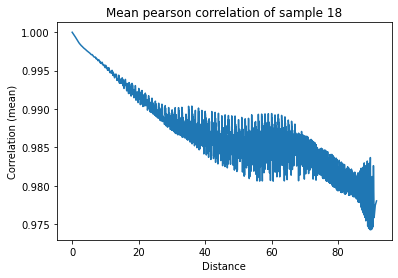

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

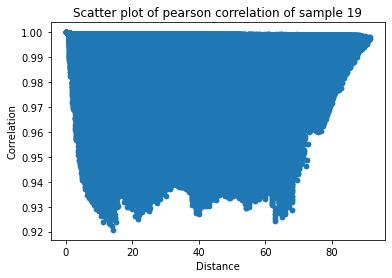

<Figure size 432x288 with 0 Axes>

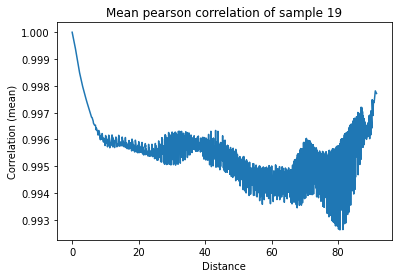

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

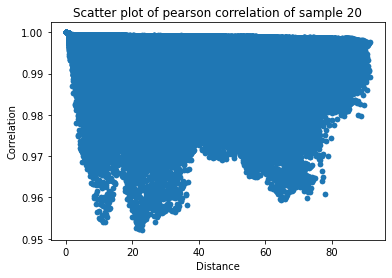

<Figure size 432x288 with 0 Axes>

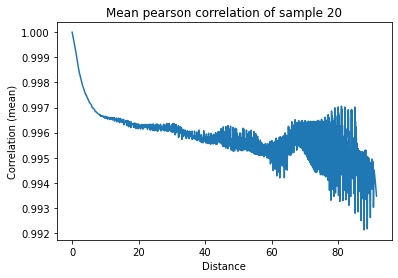

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

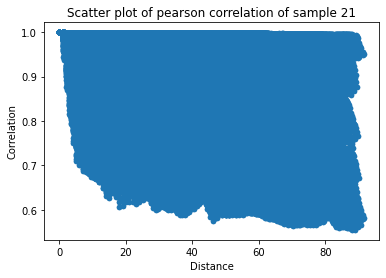

<Figure size 432x288 with 0 Axes>

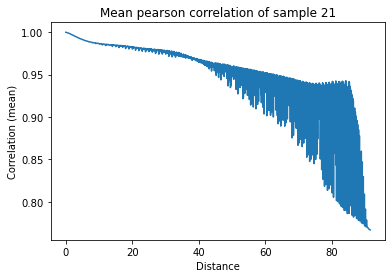

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

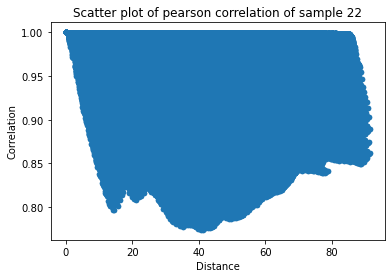

<Figure size 432x288 with 0 Axes>

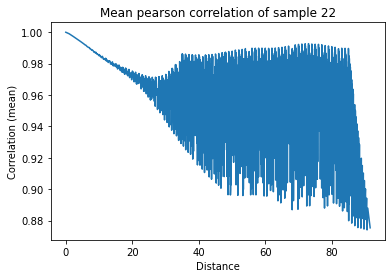

0/86
1/86
2/86
3/86
4/86
5/86
6/86
7/86
8/86
9/86
10/86
11/86
12/86
13/86
14/86
15/86
16/86
17/86
18/86
19/86
20/86
21/86
22/86
23/86
24/86
25/86
26/86
27/86
28/86
29/86
30/86
31/86
32/86
33/86
34/86
35/86
36/86
37/86
38/86
39/86
40/86
41/86
42/86
43/86
44/86
45/86
46/86
47/86
48/86
49/86
50/86
51/86
52/86
53/86
54/86
55/86
56/86
57/86
58/86
59/86
60/86
61/86
62/86
63/86
64/86
65/86
66/86
67/86
68/86
69/86
70/86
71/86
72/86
73/86
74/86
75/86
76/86
77/86
78/86
79/86
80/86
81/86
82/86
83/86
84/86
85/86


<Figure size 432x288 with 0 Axes>

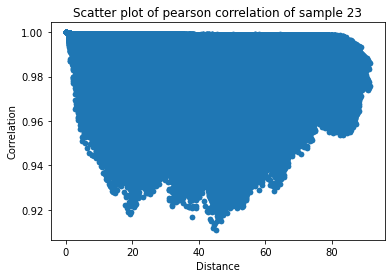

<Figure size 432x288 with 0 Axes>

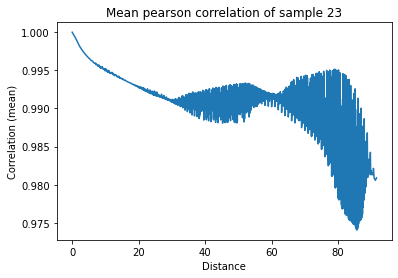

In [2]:
data = np.load("C:\\Users\\tomim\\OneDrive\\Työpöytä\\Työt\\Python\\RGBanalysisFull\\RGB\\Calibrated\\sample_r_cal.csv.npy")
corrtype = "pearson"

for sample in range(5,24):
    res = Correlations(data[sample-1], corrtype)
    res.to_pickle(f"Correlation_plots\\spearcorr{sample}")    
    PlotandSave(res, sample, corrtype)

In [17]:
print(res)

           0         1
0        0.0  1.000000
1        1.0  0.959309
2        2.0  0.940597
3        3.0  0.933193
4        4.0  0.926786
...      ...       ...
9060095  4.0  0.959789
9060096  3.0  0.961391
9060097  2.0  0.968887
9060098  1.0  0.984297
9060099  0.0  1.000000

[9060100 rows x 2 columns]
